In [2]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup as BS
import seaborn as sns

In [3]:
world_edu_rank = pd.read_csv('data/world_edu_rank.csv')
country_codes = pd.read_csv('data/country_codes.csv')
fide_ratings = pd.read_csv('data/upd_fide_ratings.csv') #A lot of data cleaning happened and I didn't want to lose it when I cleared the notebook and ran it from the top

In [4]:
world_edu_rank

,rank,country
0,1,Denmark
1,2,South Korea
2,3,Netherlands
3,4,Germany
4,5,Ireland
...,...,...
198,199,Kosovo
199,200,Democratic Republic of the Congo
200,201,Andorra
201,202,South Sudan


In [18]:
fide_ratings = fide_ratings.drop("Unnamed: 0", axis=1)

In [19]:
fide_ratings.to_csv('data/upd_fide_ratings.csv', index=False)

In [14]:
country_codes

,country,a3
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM
...,...,...
244,Wallis and Futuna,WLF
245,Western Sahara,ESH
246,Yemen,YEM
247,Zambia,ZMB


In [328]:
world_edu_rank = pd.merge(left=world_edu_rank, right=country_codes, left_on='country', right_on='country', how='left')

In [465]:
world_edu_rank.at[198, 'a3'] = 'KOS'

In [467]:
world_edu_rank['a3'].unique()

array(['DNK', 'KOR', 'NLD', 'DEU', 'IRL', 'SWE', 'FIN', 'SVN', 'FRA',
       'BEL', 'AUS', 'ISL', 'JPN', 'GBR', 'NOR', 'CAN', 'ESP', 'ISR',
       'RUS', 'POL', 'HKG', 'SGP', 'PRT', 'LTU', 'EST', 'NZL', 'CHE',
       'HUN', 'USA', 'TWN', 'LVA', 'GRC', 'CZE', 'AUT', 'ITA', 'CHN',
       'TUR', 'ARG', 'MEX', 'CHL', 'SVK', 'LUX', 'KAZ', 'CRI', 'SAU',
       'GRD', 'BRN', 'SMR', 'FJI', 'WSM', 'SYC', 'MNG', 'VNM', 'ECU',
       'MLT', 'NPL', 'BLR', 'OMN', 'KNA', 'MDV', 'LKA', 'MAC', 'UZB',
       'KGZ', 'VCT', 'ALB', 'IDN', 'SRB', 'TLS', 'GEO', 'PHL', 'KIR',
       'DZA', 'COL', 'ATG', 'HRV', 'PER', 'MUS', 'GIB', 'MNE', 'IRN',
       'BHR', 'LIE', 'EGY', 'BLZ', 'AZE', 'TJK', 'BTN', 'MYS', 'KEN',
       'QAT', 'NRU', 'KWT', 'DMA', 'BOL', 'DOM', 'LCA', 'ARM', 'ROU',
       'VGB', 'IND', 'LAO', 'URY', 'TUN', 'SWZ', 'GHA', 'THA', 'MDA',
       'MMR', 'PRK', 'VEN', 'SLV', 'MAR', 'ZAF', 'JAM', 'PAN', 'SLB',
       'CPV', 'STP', 'KHM', 'TGO', 'BGD', 'PNG', 'TUV', 'SLE', 'GTM',
       'JOR', 'SUR',

In [262]:
fide_ratings['Fed'].unique()

array(['IND', 'BAN', 'EGY', 'MAS', 'CHN', 'IRQ', 'INA', 'BRN', 'GER',
       'IRI', 'SWE', 'NOR', 'DEN', 'SRI', 'SGP', 'TAN', 'SUD', 'USA',
       'NED', 'FIN', 'MDV', 'ESP', 'RUS', 'FRA', 'UAE', 'PAK', 'AUS',
       'MAR', 'ENG', 'GHA', 'PHI', 'JOR', 'TUR', 'CUB', 'PER', 'ECU',
       'DOM', 'ARG', 'URU', 'PAN', 'AUT', 'SUI', 'KGZ', 'PLE', 'LBA',
       'GEO', 'ARM', 'UKR', 'CAY', 'ISR', 'ITA', 'BOL', 'FID', 'CHI',
       'MEX', 'CRC', 'GUA', 'ESA', 'ETH', 'AZE', 'TUN', 'VEN', 'KAZ',
       'CYP', 'GRE', 'CRO', 'KOS', 'BIH', 'CAN', 'LBN', 'JAM', 'SYR',
       'BEL', 'ALG', 'UZB', 'MLT', 'BRU', 'BRA', 'MTN', 'POL', 'DJI',
       'YEM', 'CHA', 'AFG', 'SOM', 'PAR', 'SUR', 'SEN', 'TKM', 'QAT',
       'MOZ', 'NGR', 'SCO', 'TJK', 'UGA', 'BUL', 'IRL', 'ROU', 'POR',
       'SLO', 'JPN', 'KEN', 'ANG', 'HUN', 'SRB', 'SVK', 'MAC', 'COL',
       'CZE', 'NAM', 'ZAM', 'LBR', 'EST', 'LTU', 'LAT', 'TTO', 'KSA',
       'RSA', 'NZL', 'MDA', 'BLR', 'MNE', 'KUW', 'NCA', 'SEY', 'PUR',
       'ISL', 'MRI',

In [470]:
fide_ratings['Fed'].value_counts().tail(25)

DJI    17
ERI    16
BDI    16
BUR    15
MLI    15
SOL    15
IOM    12
NRU    11
CAY    11
GAM    11
ANT    10
PNG    10
COD     8
CAM     8
GEQ     7
SLE     7
GAB     6
DMA     6
IVB     5
CAF     5
VIN     4
CHA     3
COM     1
SKN     1
Ind     1
Name: Fed, dtype: int64

In [474]:
fide_ratings = pd.merge(left=fide_ratings, right=world_edu_rank, left_on='Fed', right_on='a3', how='left')

In [560]:
fide_ratings.sort_values(by='Fed')

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,APR23,Gms,K,B-day,Flag,rank,country,a3
170124,11701412,"Kamal, Mohammad Haroon",AFG,M,NaN,NaN,NaN,NaN,1523,0,40,1992,i,146.0,Afghanistan,AFG
27180,11701897,"Azimy, Hekmatullah",AFG,M,NaN,NaN,NaN,NaN,1522,0,40,1992,i,146.0,Afghanistan,AFG
20886,11700203,"Aria, Kamos",AFG,M,NaN,NaN,NaN,NaN,1717,0,40,1985,i,146.0,Afghanistan,AFG
329803,11701048,Sayed Noorullah,AFG,M,NaN,NaN,NaN,NaN,1622,0,40,0,i,146.0,Afghanistan,AFG
328271,11700580,"Sarwari, Hamidullah",AFG,M,NaN,NaN,NaN,NaN,1895,0,20,1989,NaN,146.0,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67858,11004673,"Chibvuri, John Snr",ZIM,M,NaN,NaN,NaN,NaN,1760,0,40,1981,i,NaN,NaN,NaN
229911,11000210,"Mauwa, Tedmore",ZIM,M,NaN,NaN,NaN,NaN,2154,0,40,0,i,NaN,NaN,NaN
261982,11001160,"Nkomo, Melusi",ZIM,M,NaN,NaN,NaN,NaN,1566,0,40,1960,i,NaN,NaN,NaN
166978,11012269,JUBANE EZRA,ZIM,M,NaN,NaN,NaN,NaN,1604,0,40,2002,NaN,NaN,NaN,NaN


In [491]:
fide_ratings.loc[fide_ratings['Fed'] == "AHO", 'country'] = "Netherlands"

In [492]:
fide_ratings['country'].unique()

array(['India', nan, 'Egypt', 'China ', 'Iraq', 'Brunei', 'Sweden',
       'Norway', 'Singapore', 'United States', 'Finland', 'Maldives',
       'Spain', 'Russia', 'France', 'Pakistan', 'Australia', 'Morocco',
       'Ghana', 'Jordan', 'Turkey', 'Cuba', 'Peru', 'Ecuador',
       'Dominican Republic', 'Argentina', 'Panama', 'Austria',
       'Kyrgyzstan', 'Georgia', 'Armenia', 'Ukraine', 'Israel', 'Italy',
       'Bolivia', 'Mexico', 'Ethiopia', 'Azerbaijan', 'Tunisia',
       'Venezuela', 'Kazakhstan', 'Cyprus', 'Kosovo',
       'Bosnia and Herzegovina', 'Canada', 'Lebanon', 'Jamaica', 'Syria',
       'Belgium', 'Uzbekistan', 'Malta', 'Brazil', 'Poland', 'Djibouti',
       'Yemen', 'Afghanistan', 'Somalia', 'Suriname', 'Senegal',
       'Turkmenistan', 'Qatar', 'Mozambique', 'Tajikistan', 'Uganda',
       'Ireland', 'Romania', 'Japan', 'Kenya', 'Hungary', 'Serbia',
       'Slovakia', 'Macau (PRC)', 'Colombia', 'Czech Republic', 'Namibia',
       'Liberia', 'Estonia', 'Lithuania', 'Trin

In [272]:
fide_ratings_bday = fide_ratings[fide_ratings['B-day'] > 1900]

In [273]:
fide_ratings_bday

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,APR23,Gms,K,B-day,Flag
0,25121731,A C J John,IND,M,NaN,NaN,NaN,NaN,1063,0,40,1987,i
1,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,1986,i
2,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,1974,i
3,10680810,"A hamed Ashraf, Abdallah",EGY,M,NaN,NaN,NaN,NaN,1728,0,40,2001,i
4,5716365,"A Hamid, Harman",MAS,M,NaN,NaN,NaN,NaN,1325,0,40,1970,i
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413943,34190632,"Zyubin, Sergey",RUS,M,NaN,NaN,NaN,NaN,1884,0,40,1975,i
413944,55746969,"Zyuganov, Igor",RUS,M,NaN,NaN,NaN,NaN,1325,0,40,2010,NaN
413945,24232602,"Zyuzev, Pavel",RUS,M,NaN,NaN,NaN,NaN,1856,0,40,1993,i
413946,1189980,"Zywert, Kacper",POL,M,NaN,NaN,NaN,NaN,1519,0,20,1999,i


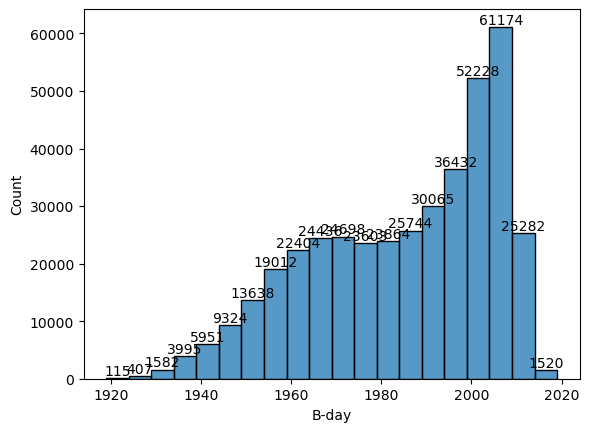

In [283]:
ax = sns.histplot(data=fide_ratings_bday, x='B-day', binwidth=5)

for i in ax.containers:
    ax.bar_label(i,)

In [284]:
fide_ratings[fide_ratings['B-day'] < 1900]['Fed'].value_counts()

IRI    1473
ARG     837
RUS     598
CAN     376
IND     364
       ... 
HUN       1
ANT       1
DJI       1
ANG       1
Ind       1
Name: Fed, Length: 133, dtype: int64

In [308]:
glbl_education = pd.read_csv('data/global_education_rankings.csv')

In [311]:
glbl_education.sort_values(by="rank2021")

,place,pop2023,growthRate,area,country,cca3,cca2,ccn3,region,subregion,landAreaKm,density,densityMi,Rank,rank2021,rank2020
0,840,339996563,0.00505,9372610,United States,USA,US,840,North America,Northern America,9147420.0,37.1686,96.2666,3,1,1.0
1,826,67736802,0.00338,242900,United Kingdom,GBR,GB,826,Europe,Northern Europe,241930.0,279.9851,725.1615,21,2,2.0
2,276,83294633,-0.00090,357114,Germany,DEU,DE,276,Europe,Western Europe,349390.0,238.4002,617.4564,19,3,4.0
3,124,38781291,0.00850,9984670,Canada,CAN,CA,124,North America,Northern America,8965590.0,4.3256,11.2032,38,4,3.0
4,250,64756584,0.00201,551695,France,FRA,FR,250,Europe,Western Europe,547557.0,118.2646,306.3052,23,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,222,6364943,0.00451,21041,El Salvador,SLV,SV,222,North America,"Central America, Latin America",20720.0,307.1884,795.6179,112,74,NaN
73,116,16944826,0.01056,181035,Cambodia,KHM,KH,116,Asia,South-Eastern Asia,176520.0,95.9938,248.6239,73,75,NaN
74,104,54577997,0.00736,676578,Myanmar,MMR,MM,104,Asia,South-Eastern Asia,652670.0,83.6227,216.5827,27,76,71.0
75,368,45504560,0.02266,438317,Iraq,IRQ,IQ,368,Asia,"Western Asia, The Middle East",434128.0,104.8183,271.4794,35,77,NaN


In [317]:
prelim_merge = pd.merge(left=fide_ratings, right=glbl_education[['country', 'cca3']], left_on="Fed", right_on="cca3", how="left")

In [319]:
prelim_merge['country'].value_counts()

Russia                38650
India                 37109
Spain                 29286
France                27916
Poland                12495
Italy                 12286
Turkey                 9679
United States          8357
Hungary                6858
Brazil                 6356
Argentina              6136
Serbia                 5809
Romania                5258
Ukraine                4978
Sweden                 4487
Slovakia               4346
Austria                4161
Norway                 3979
Belgium                3962
Peru                   3584
Colombia               3426
Israel                 3206
Kazakhstan             3157
Australia              3000
Mexico                 2990
Egypt                  2790
Azerbaijan             2235
Canada                 2176
China                  1833
Ecuador                1481
Belarus                1285
Uzbekistan             1265
Lithuania              1241
Finland                1200
Iraq                    940
Dominican Republic  

In [4]:
usa_gms = fide_ratings[(fide_ratings['Fed'] == 'USA') & (fide_ratings['APR23'] >= 2000)]

In [19]:
usa_gms = usa_gms.reset_index()

In [6]:
usa_gms = usa_gms.drop(['index'], axis=1)

In [7]:
usa_gms['Name']

0               Aaron, Deepak
1              Abbasi, Nasser
2                Abdi, Farzad
3               Abdul, Herman
4       Abdul-Rahman, Rahwaiz
                ...          
2569            Zisman, Boris
2570       Zlotnikov, Mikhail
2571              Zong, Davis
2572       Zuckerman, Bernard
2573             Zuniga, Ivan
Name: Name, Length: 2574, dtype: object

In [8]:
usa_gms['Name'][0].split(", ")[0]

'Aaron'

In [9]:
for index, row in usa_gms.iterrows():
    if len(row.Name.split(", "))>=2: 
            usa_gms.loc[index, 'cleaned_name'] = row.Name.split(", ")[1] + " " + row.Name.split(", ")[0]
    else:
        usa_gms[index, 'cleaned_name'] = ""

In [30]:
usa_gms

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,APR23,Gms,K,B-day,Flag,cleaned_name,"(62, cleaned_name)","(1174, cleaned_name)","(1947, cleaned_name)","(2046, cleaned_name)"
0,2009412,"Aaron, Deepak",USA,M,NaN,NaN,NaN,NaN,2248,5,20,1994,NaN,Deepak Aaron,,,,
1,2008645,"Abbasi, Nasser",USA,M,FM,NaN,NaN,NaN,2305,0,20,1957,i,Nasser Abbasi,,,,
2,2076829,"Abdi, Farzad",USA,M,NaN,NaN,NaN,NaN,2068,0,20,1981,NaN,Farzad Abdi,,,,
3,2012081,"Abdul, Herman",USA,M,NaN,NaN,NaN,NaN,2080,0,40,1967,i,Herman Abdul,,,,
4,2009269,"Abdul-Rahman, Rahwaiz",USA,M,NaN,NaN,NaN,NaN,2036,0,40,1995,i,Rahwaiz Abdul-Rahman,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,2006910,"Zisman, Boris",USA,M,FM,NaN,NaN,NaN,2249,0,20,1941,i,Boris Zisman,,,,
2570,2001900,"Zlotnikov, Mikhail",USA,M,IM,NaN,NaN,NaN,2130,3,10,1949,NaN,Mikhail Zlotnikov,,,,
2571,30903955,"Zong, Davis",USA,M,CM,NaN,NaN,NaN,2151,0,40,2006,NaN,Davis Zong,,,,
2572,2000423,"Zuckerman, Bernard",USA,M,IM,NaN,NaN,NaN,2455,0,10,1943,i,Bernard Zuckerman,,,,


In [256]:
usa_gms['cleaned_name'].value_counts()

Leonid Furman           2
Kevin Wang              2
Eric Zhang              2
Michael Wang            2
James Petranovich       1
                       ..
Neeraj Harish           1
Luke Harmon-Vellotti    1
Warren Harper           1
David Harris            1
Ivan Zuniga             1
Name: cleaned_name, Length: 2570, dtype: int64

In [86]:
for index, row in usa_gms.iterrows():
    if requests.get("https://en.wikipedia.org/wiki/" + row.cleaned_name.replace(" ", "_")).status_code == 200:
        usa_gms.loc[index, 'wiki_status'] = "good"
    else:
        usa_gms.loc[index, 'wiki_status'] = "na"

In [88]:
usa_gms['wiki_status'].value_counts()

na      2016
good     558
Name: wiki_status, dtype: int64

In [85]:
usa_gms['cleaned_name'].sort_values()

2124        AJ Steigman
1452     Aakaash Meduri
133     Aaron Balleisen
488        Aaron Decord
786     Aaron Grabinsky
             ...       
2554         Ziwen Zhou
2192          Zoey Tang
1116    Zoran Kilibarda
1231     Zoran Lazetich
977        Zviad Izoria
Name: cleaned_name, Length: 2574, dtype: object

In [83]:
usa_gms['Name'][1174] 

'Kruml. Joseph'

In [89]:
usa_gms.at[1174, 'cleaned_name'] = "Joseph Kruml" #had 4 players whose names didn't follow the syntax so I had to manually assign them.

In [91]:
usa_wiki_articles = usa_gms[usa_gms['wiki_status'] == "good"]

In [92]:
usa_wiki_articles

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,APR23,Gms,K,B-day,Flag,cleaned_name,wiki_status
7,13301918,"Abrahamyan, Tatev",USA,F,WGM,WGM,NaN,NaN,2282,2,20,1988,w,Tatev Abrahamyan,good
9,2034301,"Acers, Jude",USA,M,CM,NaN,NaN,NaN,2229,0,20,1944,i,Jude Acers,good
12,2009358,"Adams, Nick",USA,M,NaN,NaN,NaN,NaN,2228,0,20,1967,i,Nick Adams,good
13,30967317,"Adams, Stephen",USA,M,NaN,NaN,NaN,NaN,2097,0,40,1997,NaN,Stephen Adams,good
17,30966396,"Adewumi, Tanitoluwa",USA,M,FM,NaN,NaN,NaN,2283,3,20,2010,NaN,Tanitoluwa Adewumi,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,14116804,"Zherebukh, Yaroslav",USA,M,GM,NaN,NaN,NaN,2623,0,10,1993,NaN,Yaroslav Zherebukh,good
2561,2015323,"Ziatdinov, Raset",USA,M,GM,NaN,NaN,NaN,2115,0,10,1958,NaN,Raset Ziatdinov,good
2562,2034255,"Zierk, Steven",USA,M,GM,NaN,NaN,NaN,2488,0,10,1993,i,Steven Zierk,good
2563,2000776,"Zilber, Israel",USA,M,NaN,NaN,NaN,NaN,2400,0,10,0,i,Israel Zilber,good


In [94]:
for index, row in usa_wiki_articles.iterrows():
    usa_wiki_articles.loc[index, 'wiki_link'] = "https://en.wikipedia.org/wiki/" + row.cleaned_name.replace(" ", "_")

C:\Users\hdg\AppData\Local\Temp\ipykernel_8608\3597897056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_wiki_articles.loc[index, 'wiki_link'] = "https://en.wikipedia.org/wiki/" + row.cleaned_name.replace(" ", "_")


In [99]:
usa_wiki_articles = usa_wiki_articles.reset_index()

In [119]:
usa_wiki_articles['wiki_link'][1]

'https://en.wikipedia.org/wiki/Jude_Acers'

In [225]:
regex_birthloc= r"[A-z, ]+"

In [ ]:
test_scrape = BS(requests.get(usa_wiki_articles['wiki_link'][0]).text)

In [120]:
test_scrape2 = BS(requests.get(usa_wiki_articles['wiki_link'][1]).text)

In [230]:
test_scrape.find_all('td', {'class': 'infobox-data'})[1].text

str

In [307]:
BS(requests.get(usa_wiki_articles['wiki_link'][4]).text)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-page-tools-enabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Tanitoluwa Adewumi - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-lim

In [301]:
re.findall(r"[A-z, ]+", BS(requests.get(usa_wiki_articles['wiki_link'][2]).text))[5]

TypeError: expected string or bytes-like object

In [297]:
re.findall(r"[A-z, ]+", test_scrape.find_all('td', {'class': 'infobox-data'})[1].text)[5]

'Yerevan, Armenian SSR, Soviet Union'

In [134]:
test_scrape2.find_all('td', {'class': 'infobox-data'})[2].text

' (1944-04-06) April 6, 1944 (age\xa079)Long Beach, California, United States'

In [253]:
re.findall(regex_birthloc, test_scrape2.find_all('td', {'class': 'infobox-data'})[2].text, re.MULTILINE)[5]

'Long Beach, California, United States'